In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
import torch
from torch import nn
from torch.autograd import Function
from torch.nn import functional as F

In [29]:
class StepTanh(Function):
    
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        input[input>0] = 1
        input[input<=0] = -1
        return input
    
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_temp = grad_output.clone()
        grad_input = grad_temp * (1 - torch.tanh(input).pow(2))
        return grad_input

In [59]:
class Ising(nn.Module):
    def __init__(self):
        super(Ising, self).__init__()
        self.fc1 = nn.Linear(256, 256, bias=False)
        self.fc2 = nn.Linear(256, 256, bias=False)
        self.step_tanh = StepTanh.apply
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.step_tanh(x)
        return x

In [60]:
ising = Ising()

In [61]:
x = torch.normal(0, 1, size=(10, 256))

In [62]:
A = torch.matmul(x.T, x)

In [63]:
out = ising(A)

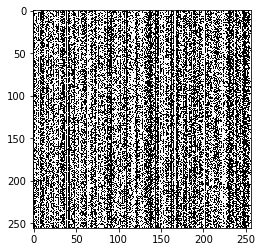

In [64]:
plt.imshow(out.detach(), cmap='gray')

In [66]:
A

tensor([[ 8.1459, -0.6545,  0.3317,  ..., -0.4194,  1.3893, -2.9325],
        [-0.6545,  4.0844, -0.5116,  ...,  4.8866,  1.5722, -1.9946],
        [ 0.3317, -0.5116,  4.0211,  ..., -1.9453, -0.3724, -1.4951],
        ...,
        [-0.4194,  4.8866, -1.9453,  ..., 11.8970,  3.9940, -6.0952],
        [ 1.3893,  1.5722, -0.3724,  ...,  3.9940, 10.6257,  0.6734],
        [-2.9325, -1.9946, -1.4951,  ..., -6.0952,  0.6734,  8.8903]])